# Evaluation terminale : Machine learning & python -- Nom Prénom

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le machine learning est l'obtention de connaissances à partir de données.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Applications commerciales : Netflix ou Amazon qui utilise des algorithme d'apprentissage automatique pour conseiller les consommateurs.
Scientifiques : Détection de tumeurs, différencier différentes types d'éspèces à partir de photos, analyser des séquences d'ADN.

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

L'apprentissage supervisé et non-supervisé.
Dans l'apprentissage supervisé on explique à l'algorithme le lien entre les entrées et les sorties.
Dans l'apprentissage non supervisé, on ne connait que les données en entrées mais on ne sait pas à quoi s'attendre sur les données de retour.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

La classification fait partie de la famille des apprentissages supervisés et le clustering des non-supervisés.

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

On parle d'overfitting lorsque l'arbre de décision créé trop de noeuds et est dont imprécis.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [17]:
# importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

from sklearn.model_selection import GridSearchCV, cross_val_score


Importez les données comme suit :

In [31]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [32]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

La colonne name car elle est nom significative et n'aide pas à l'analyse des données.

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [33]:
data.drop(labels=['Name'], axis=1, inplace=True)
data.shape

(1340, 20)

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Oui, il en contient.

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [35]:
# code...
print(data.isnull().sum())
data.dropna(inplace=True) 
data.shape

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


(1329, 20)

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [36]:
# code..

y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state=42)
X_train

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
287,67,18.2,6.9,2.6,6.3,40.8,0.3,1.0,32.9,1.4,1.7,83.3,0.5,1.3,1.7,3.0,0.6,0.1,1.6
1292,51,15.0,4.8,1.9,4.6,41.9,0.0,0.1,33.3,0.9,1.4,65.7,0.9,1.7,2.6,1.2,0.7,0.3,0.9
1117,24,8.5,2.1,0.6,2.1,29.4,0.3,1.0,26.1,0.6,0.8,75.0,0.1,0.8,0.9,0.8,0.2,0.0,0.5
294,66,14.2,4.4,1.5,3.1,47.1,0.0,0.0,0.0,1.4,2.1,69.3,1.1,1.9,2.9,0.8,0.6,0.2,0.7
921,82,36.5,21.0,7.6,17.9,42.6,0.8,2.6,32.2,5.0,6.4,77.7,2.2,3.8,6.1,2.8,1.2,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,39,13.8,5.6,2.2,4.4,50.0,0.2,0.5,38.9,1.0,1.4,71.4,0.7,1.3,1.9,0.5,0.2,0.1,0.5
1141,58,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7
1305,45,6.2,2.6,1.0,2.4,41.5,0.0,0.0,0.0,0.6,1.0,63.0,1.1,1.6,2.6,0.2,0.2,0.5,0.5
871,67,16.9,5.1,2.0,3.4,59.6,0.0,0.0,0.0,1.1,1.8,57.7,1.6,2.9,4.5,0.6,0.5,0.3,0.8


#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse 

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [40]:
# code..
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
estimate = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, estimate)
auc_ = auc(fpr,tpr)
print(auc_)

0.5947970043358297


#### Exercice 2.5: Evaluez la qualité du modèle. 

In [18]:
# code..

#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Réponse 

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Réponse 

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

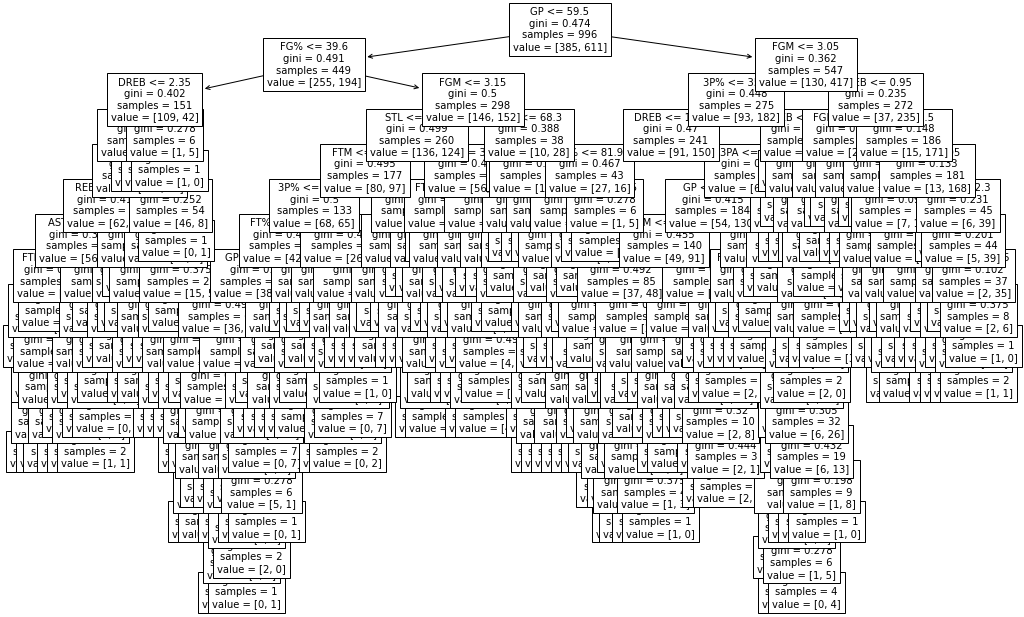

In [41]:
# code..
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse 

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Réponse 

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [19]:
# code..

#### Question 2.8: Concluez

Réponse